In [6]:
# Importing libraries
import numpy as np
import pandas as pd
import cantera as ct
import matplotlib.pyplot as plt
import matplotlib_inline as line

# Importing packages
import feedstock2 as fs
import pp2 as pp
import gasifier2 as g
import fuel as fu
import energy as en
import outputs as op

In [7]:
# Figure 2 - RODRIGUES (2016)
fuel = 'Average' # Average sawdust
T1 = 1000 # K
T2 = 1100 # K
moist = 0.15/(1-0.15) # kg/kg
P = ct.one_atm # 101325 Pa
ER = np.linspace(0.0, 1.0, 100)
species = ['C(gr)','N2','H2','CO','CH4','CO2','H2O']

fractions1 = np.zeros((len(ER), len(species)))
fractions2 = np.zeros((len(ER), len(species)))

for i, ER_i in enumerate(ER):
    report1 = g.gasifier(fuel, mass=1.0, moist=moist, T=T1, P=P, 
                        air=ER_i, stm=0.0, airType='ER', stmType='SR', isot=True,
                        species=species)
    report2 = g.gasifier(fuel, mass=1.0, moist=moist, T=T2, P=P, 
                        air=ER_i, stm=0.0, airType='ER', stmType='SR', isot=True,
                        species=species)
    for j, species_j in enumerate(species):
        fractions1[i, j] = report1[species_j]
        fractions2[i, j] = report2[species_j]

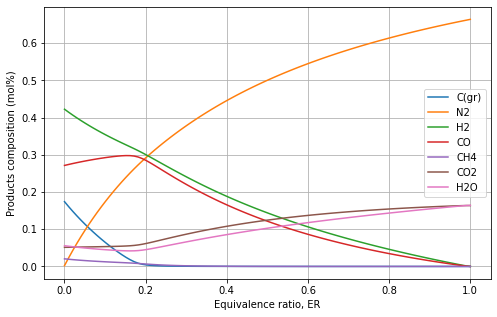

In [8]:
fig1 = plt.figure(figsize=(8,5))
plt.plot(ER, fractions1[:, 0], label='C(gr)')
plt.plot(ER, fractions1[:, 1], label='N2')
plt.plot(ER, fractions1[:, 2], label='H2')
plt.plot(ER, fractions1[:, 3], label='CO')
plt.plot(ER, fractions1[:, 4], label='CH4')
plt.plot(ER, fractions1[:, 5], label='CO2')
plt.plot(ER, fractions1[:, 6], label='H2O')
plt.legend()
plt.xlabel('Equivalence ratio, ER')
plt.ylabel('Products composition (mol%)')
plt.grid()
plt.show()

In [9]:
# Table 5 - RODRIGUES (2016)
coal = 'HighAshCoal'
rice = 'RiceHusk'
coconut = 'Coconut'
wood = 'Pine1'
charcoal = 'Charcoal'
caneBagasse = 'Bagasse1'
caneStraw = 'CaneStraw'
elephant = 'CapimElefante0'
fuelList = [coal, rice, coconut, wood, charcoal, caneBagasse, caneStraw, elephant]

species = ['C(gr)','N2','H2','CO','CH4','CO2','H2O', 'H2S', 'NH3']

ER = 0.4
T = 1000 + 273.15
P = ct.one_atm
moist = 0 # dry fuels

full = []
for i, f in enumerate(fuelList):
    d = g.gasifier(f, mass=1.0, moist=moist, T=T, P=P, air=ER, 
                    stm=0.0, airType='ER', stmType='SR', isot=True,
                    species=species)
    full.append([d['FuelID'], round(d['H2']*100,1), round(d['CO']*100,1), round(d['CH4']*10**6,2), 
                round(d['CO2']*100,1), round(d['H2O']*100,1), round(d['H2S']*10**6,2), 
                round(d['NH3']*10**6,2),round(d['Y'],2), round(d['HHV'],2), round(d['CC'],1), round(d['CGE'],1)])

df = pd.DataFrame(full, columns=['Fuel', 'H2 (%)', 'CO (%)', 'CH4 (ppm)', 
                'CO2 (%)', 'H2O (%)', 'H2S (ppm)', 'NH3 (ppm)', 'Gas yield (Nm³/kg, db)',
                'HHV (MJ/kg, db)', 'CC (%)', 'CGE (%)'])
display(df)

,Fuel,H2 (%),CO (%),CH4 (ppm),CO2 (%),H2O (%),H2S (ppm),NH3 (ppm),"Gas yield (Nm³/kg, db)","HHV (MJ/kg, db)",CC (%),CGE (%)
0,HighAshCoal,10.3,19.5,0.51,6.5,5.7,623.73,3.51,0.68,6.49,99.8,44.8
1,RiceHusk,12.2,23.1,0.66,8.7,7.6,235.20,4.05,0.96,9.05,99.9,53.2
2,Coconut,13.6,23.9,1.21,6.1,5.8,25.97,4.93,1.31,13.22,100.0,54.3
3,Pine1,14.6,23.6,1.18,6.8,6.9,10.53,5.31,1.44,14.30,100.0,66.1
4,Charcoal,13.3,28.1,2.88,3.3,2.6,83.94,4.85,1.76,19.19,100.0,75.9
5,Bagasse1,14.5,22.0,0.84,8.2,8.9,52.21,5.16,1.27,12.16,100.0,60.6
6,CaneStraw,14.9,21.8,0.96,7.5,8.5,92.62,5.45,1.32,12.72,100.0,66.9
7,CapimElefante0,13.6,21.5,0.71,8.4,8.8,83.62,4.77,1.11,10.50,100.0,56.1


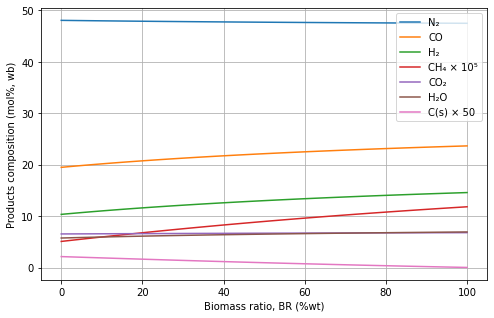

In [10]:
# Figure 6 - - RODRIGUES (2016)

fuel1 = coal
fuel2 = wood
ER = 0.4
T = 1000 + 273.15
P = ct.one_atm
bld = np.linspace(0.0, 1.0, 100)

axis = []
for i, b in enumerate(bld):
    d = g.cogasifier(fuel1, fuel2, mass=1.0, blend=b, T=T, P=P, air=ER, species=species)
    axis.append([d['N2'], d['CO'], d['H2'], d['CH4']*10**5, d['CO2'], d['H2O'], d['C(gr)']*50])

fig = plt.figure(figsize=(8,5))
plt.plot(bld*100, [a[0] for a in axis], label='N₂')
plt.plot(bld*100, [a[1] for a in axis], label='CO')
plt.plot(bld*100, [a[2] for a in axis], label='H₂')
plt.plot(bld*100, [a[3] for a in axis], label='CH₄ × 10⁵')
plt.plot(bld*100, [a[4] for a in axis], label='CO₂')
plt.plot(bld*100, [a[5] for a in axis], label='H₂O')
plt.plot(bld*100, [a[6] for a in axis], label='C(s) × 50')
plt.legend()
plt.xlabel('Biomass ratio, BR (%wt)')
plt.ylabel('Products composition (mol%, wb)')
plt.grid()
plt.show()